# Importing Libraries and Loading Dataset

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.inspection import permutation_importance
from scipy.stats import ttest_rel
import time

# Load datasets
train_data = pd.read_csv('dataset/loan-10k.lrn.csv')
test_data = pd.read_csv('dataset/loan-10k.tes.csv')

# Dataset preprocessing


In [55]:
# Training Dataset
print("Training Dataset Information:")
print(train_data.info())
print("\nTraining Dataset Sample:")
print(train_data.head())

# Test Dataset
print("\nTest Dataset Information:")
print(test_data.info())
print("\nTest Dataset Sample:")
print(test_data.head())

Training Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10000 non-null  int64  
 1   loan_amnt                   10000 non-null  float64
 2   funded_amnt                 10000 non-null  float64
 3   funded_amnt_inv             10000 non-null  float64
 4   term                        10000 non-null  object 
 5   int_rate                    10000 non-null  float64
 6   installment                 10000 non-null  float64
 7   emp_length                  10000 non-null  object 
 8   home_ownership              10000 non-null  object 
 9   annual_inc                  10000 non-null  float64
 10  verification_status         10000 non-null  object 
 11  loan_status                 10000 non-null  object 
 12  pymnt_plan                  10000 non-null  object 
 13  pu

# Vizualisation 


Selected Top Numerical Features Based on Variance:
Index(['tot_hi_cred_lim', 'tot_cur_bal', 'annual_inc', 'total_bal_ex_mort',
       'total_il_high_credit_limit', 'total_rev_hi_lim', 'ID',
       'total_bc_limit', 'revol_bal', 'bc_open_to_buy'],
      dtype='object')
Statistical Summary of Top Numerical Features:


,tot_hi_cred_lim,tot_cur_bal,annual_inc,total_bal_ex_mort,total_il_high_credit_limit,total_rev_hi_lim,ID,total_bc_limit,revol_bal,bc_open_to_buy
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,1.914525e+05,1.541102e+05,8.212897e+04,5.535178e+04,48294.371800,3.574960e+04,50043.430200,2.423097e+04,16977.031900,12028.534000
std,1.846940e+05,1.660660e+05,6.769284e+04,5.243803e+04,46981.179499,3.565504e+04,28982.440166,2.539548e+04,23574.688283,16664.058967
min,2.700000e+03,0.000000e+00,5.000000e+03,0.000000e+00,0.000000,5.000000e+02,0.000000,2.000000e+02,0.000000,0.000000
25%,5.774125e+04,3.381850e+04,5.000000e+04,2.424650e+04,18881.250000,1.540000e+04,24873.250000,8.800000e+03,6208.500000,1792.750000
50%,1.298690e+05,9.370650e+04,7.000000e+04,4.151350e+04,36533.500000,2.660000e+04,50033.500000,1.710000e+04,11844.000000,5982.500000
75%,2.752100e+05,2.279442e+05,9.700000e+04,6.880825e+04,63500.500000,4.482500e+04,75261.500000,3.140000e+04,20702.500000,15493.250000
max,2.532616e+06,2.147961e+06,3.200000e+06,1.226094e+06,768775.000000,1.090700e+06,99999.000000,1.090700e+06,988767.000000,213211.000000


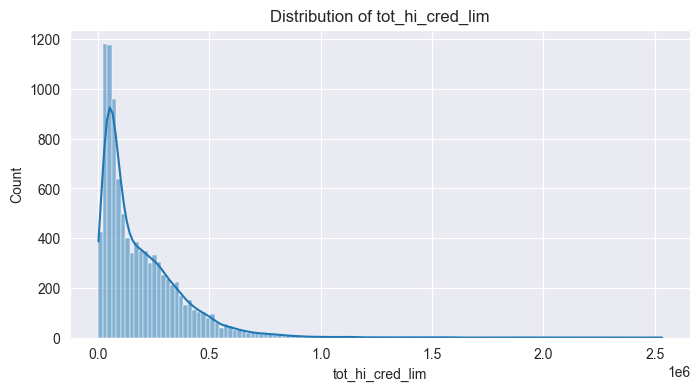

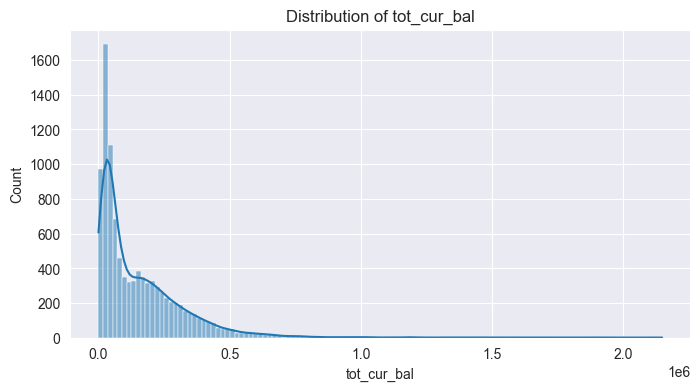

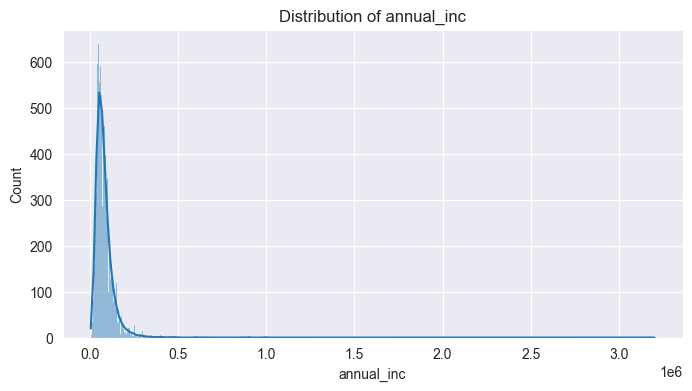

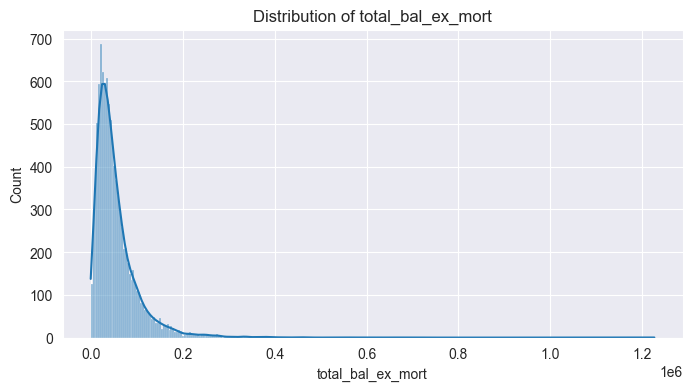

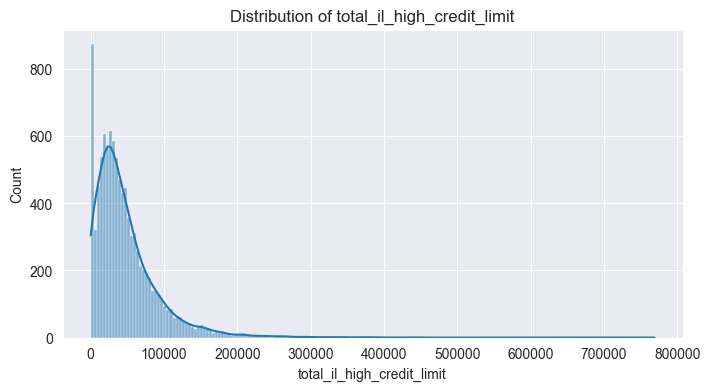

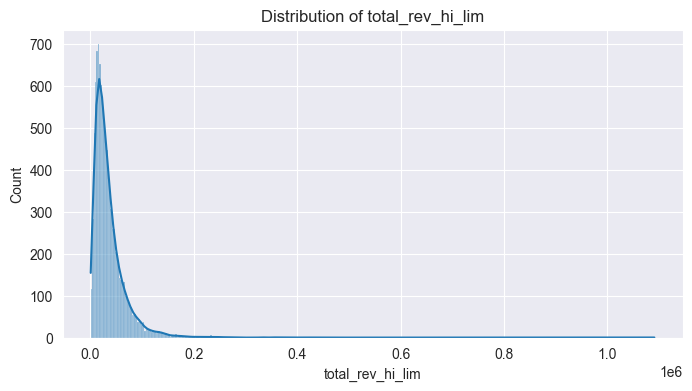

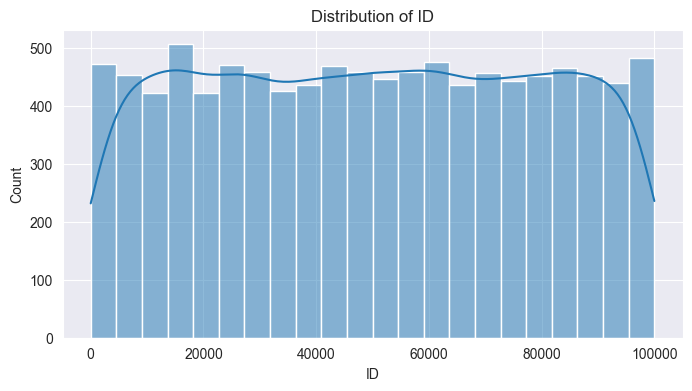

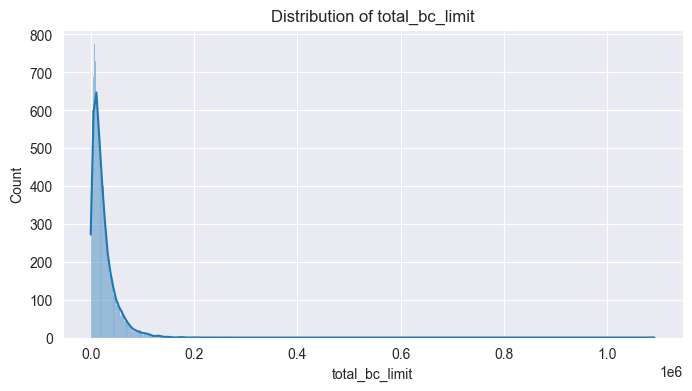

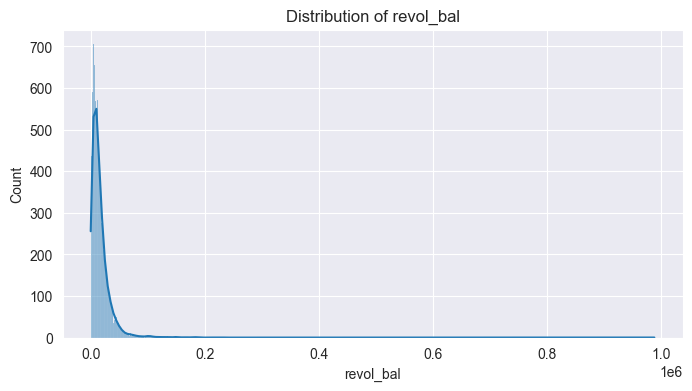

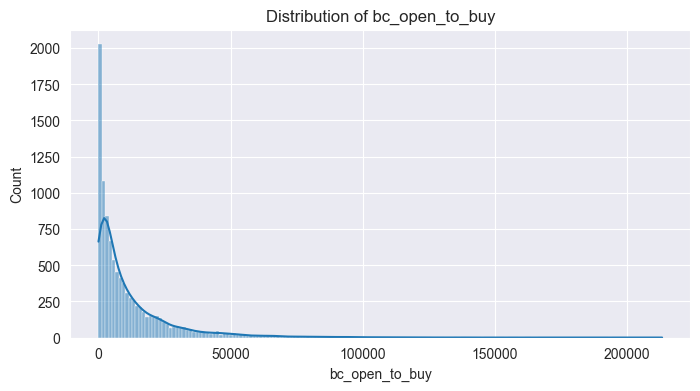

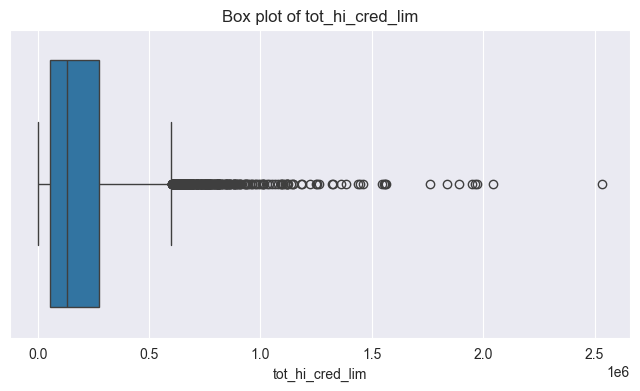

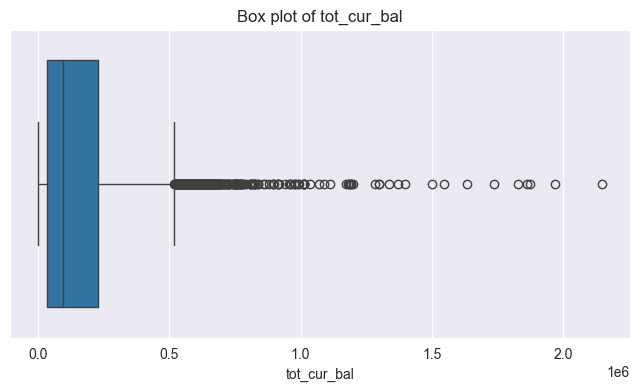

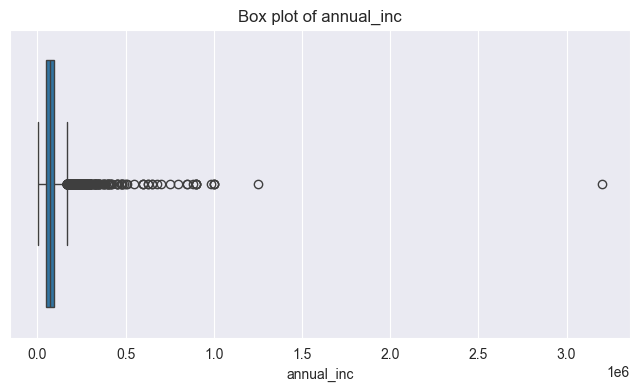

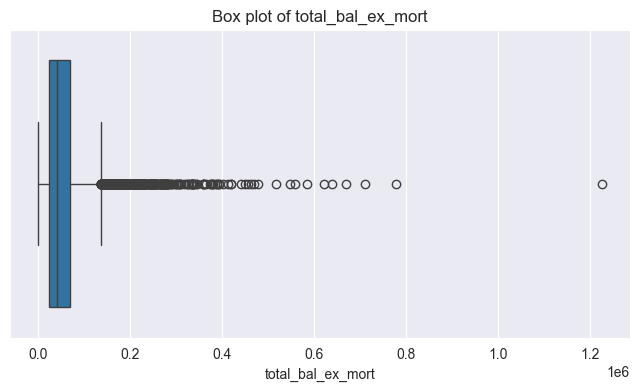

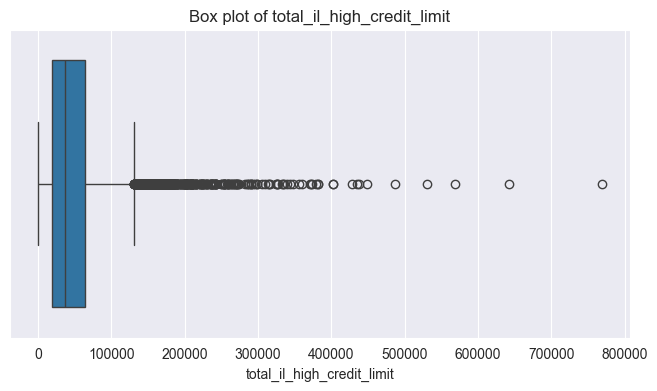

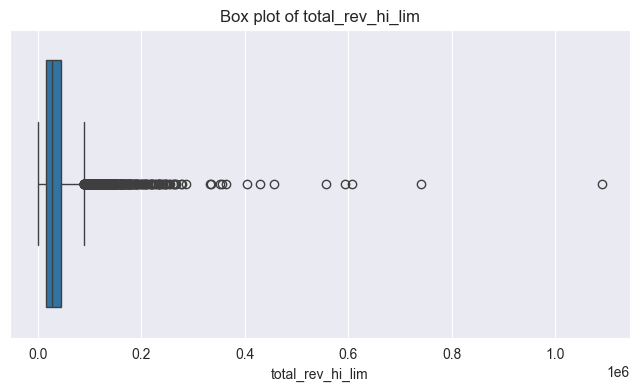

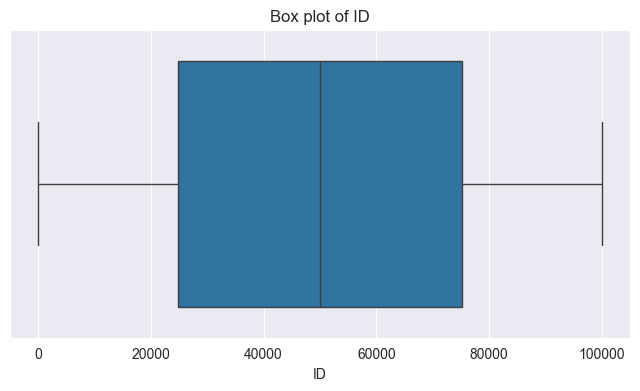

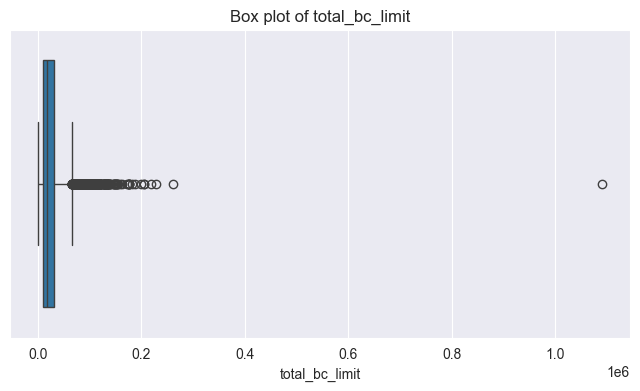

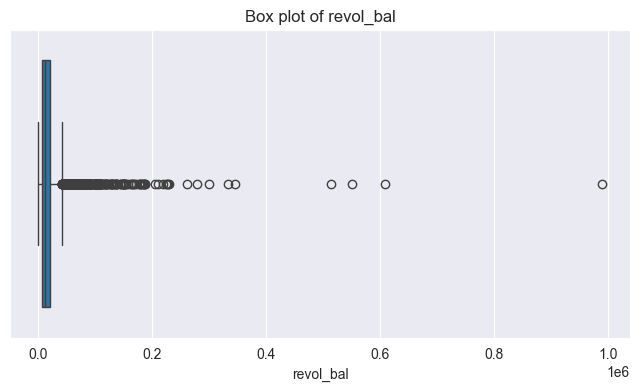

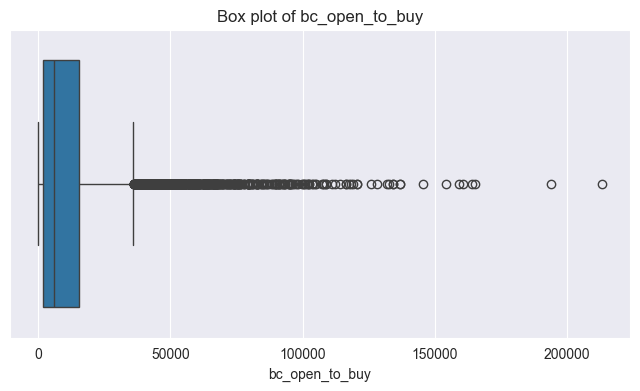

Selected Top Categorical Features Based on Unique Values:
Index(['addr_state', 'purpose', 'emp_length', 'loan_status', 'home_ownership',
       'verification_status', 'term', 'pymnt_plan', 'initial_list_status',
       'application_type'],
      dtype='object')


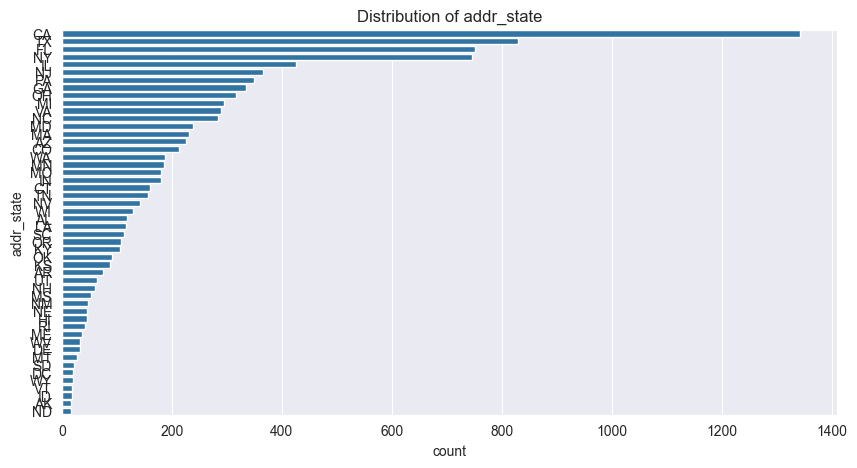

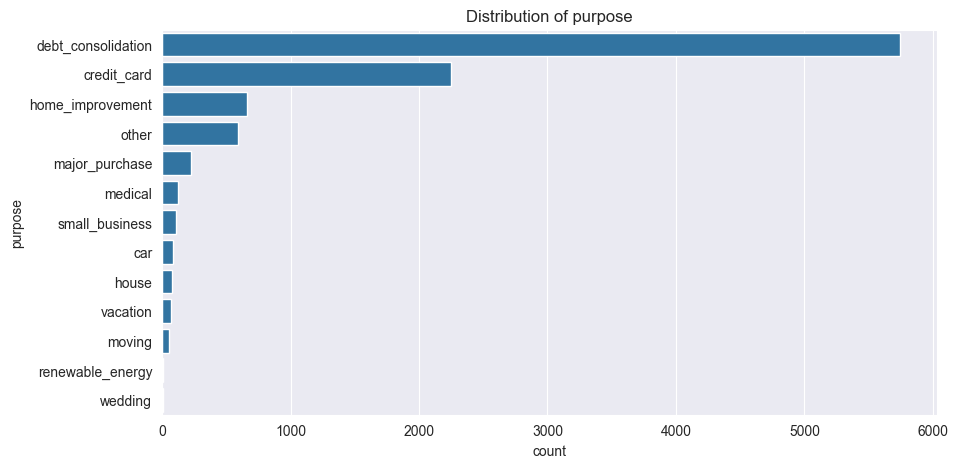

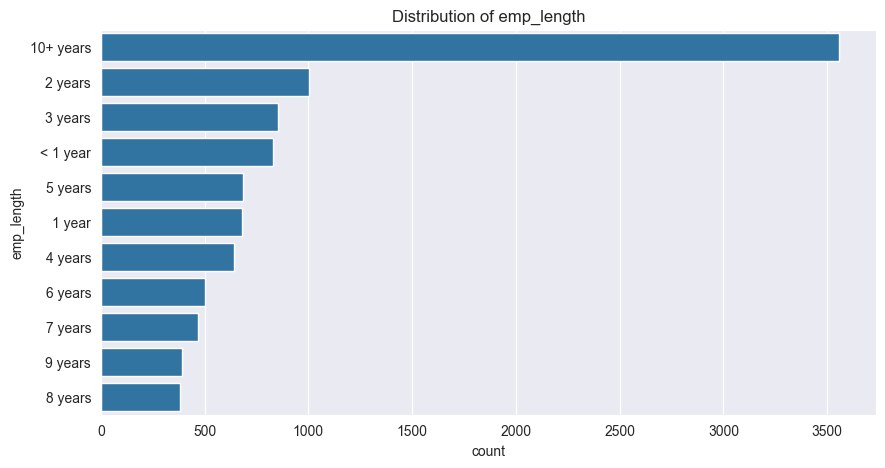

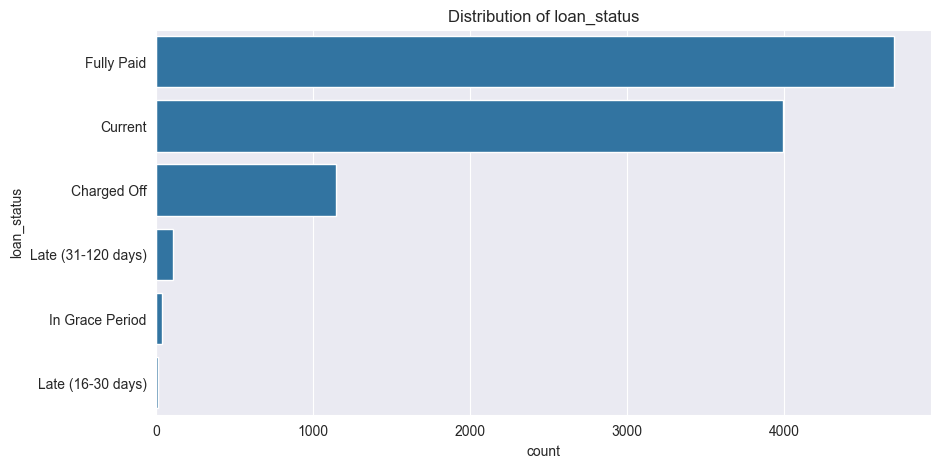

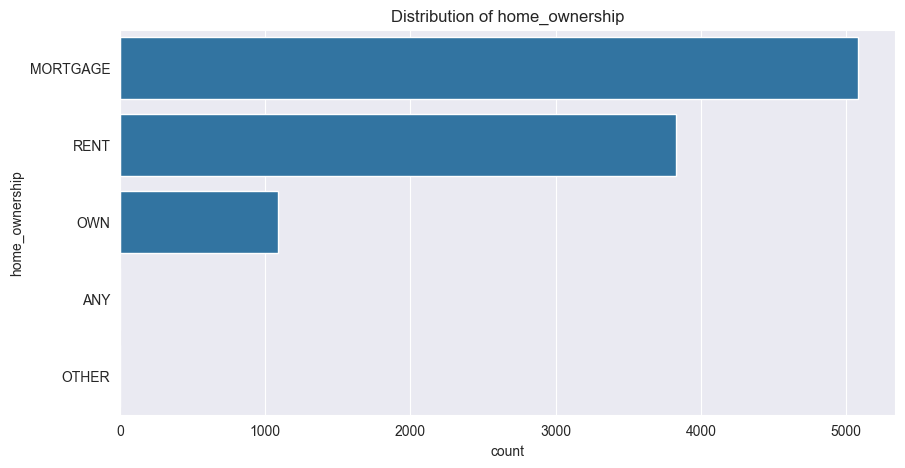

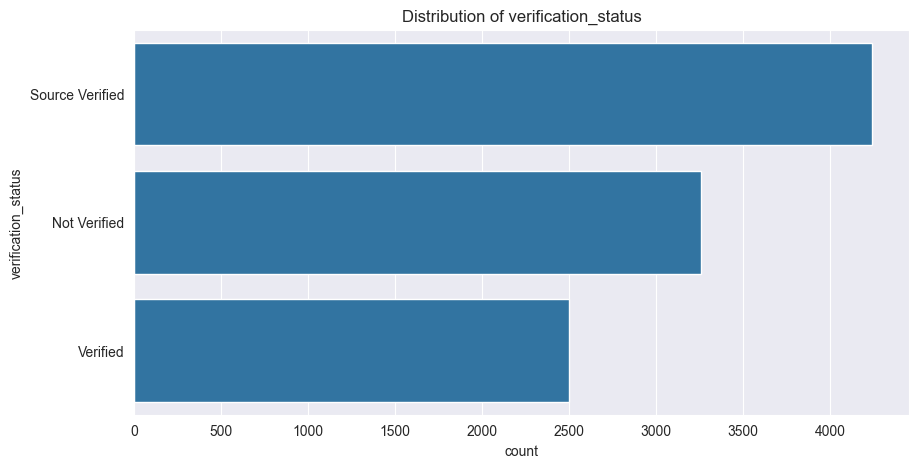

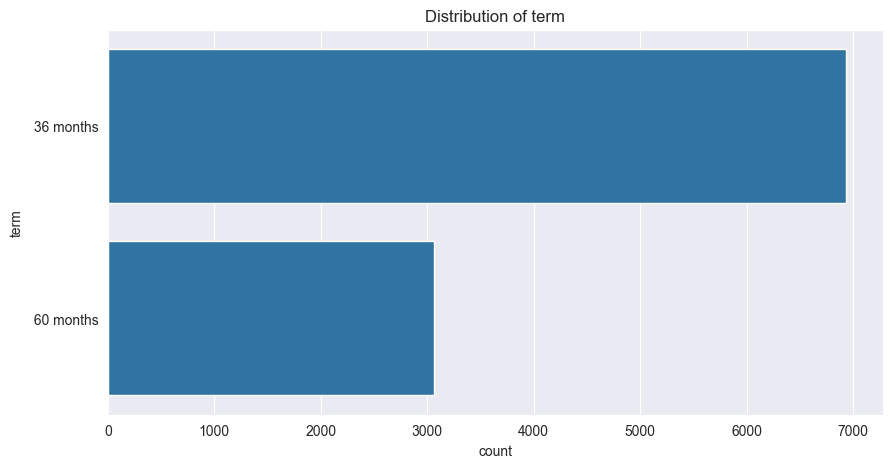

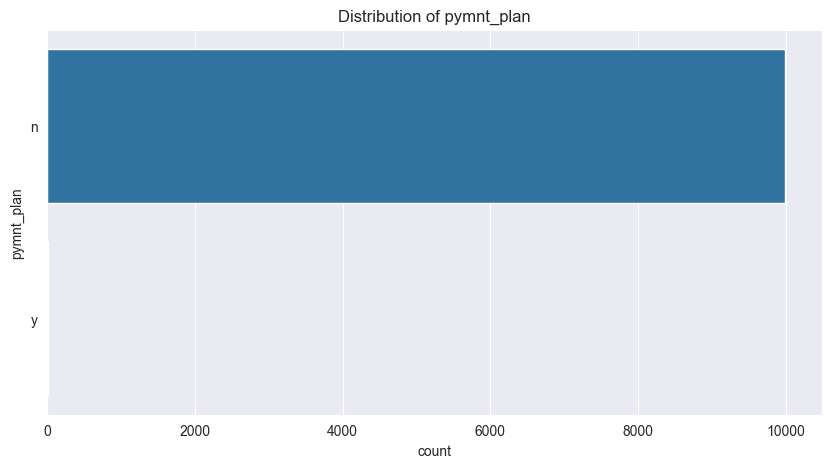

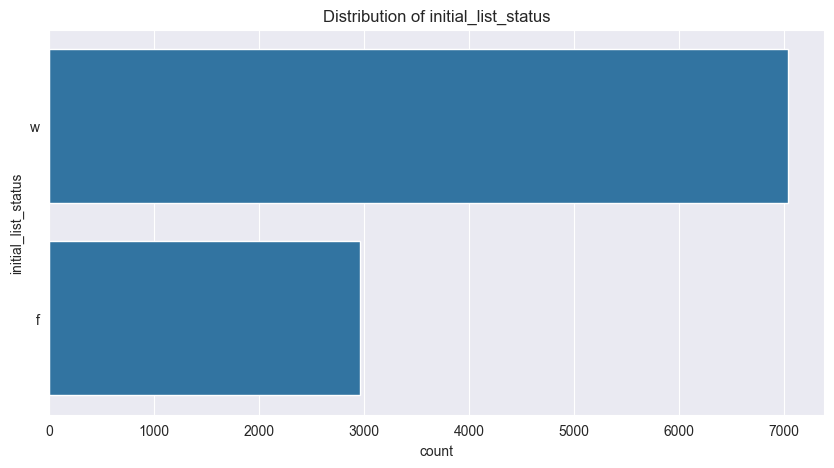

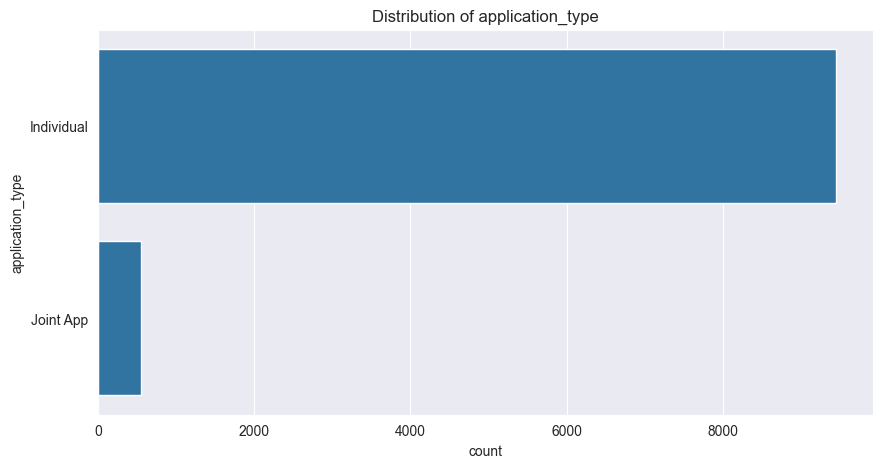

In [56]:
# Identify numeric and categorical features
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data.select_dtypes(exclude=['int64', 'float64']).columns

# Optionally, you can remove the target variable if it's included
target_col = 'grade'
if target_col in numeric_features:
    numeric_features = numeric_features.drop(target_col)
if target_col in categorical_features:
    categorical_features = categorical_features.drop(target_col)

# Select top numerical features based on variance
variance = train_data[numeric_features].var().sort_values(ascending=False)
top_numeric_features = variance.index[:10]

print("Selected Top Numerical Features Based on Variance:")
print(top_numeric_features)

# Statistical summaries for top numerical features
print("Statistical Summary of Top Numerical Features:")
display(train_data[top_numeric_features].describe())

# Histograms/Density Plots for Top Numerical Features
for feature in top_numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Box Plots for Top Numerical Features
for feature in top_numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_data[feature].dropna())
    plt.title(f'Box plot of {feature}')
    plt.show()

# Select top categorical features based on number of unique values
unique_counts = train_data[categorical_features].nunique().sort_values(ascending=False)
top_categorical_features = unique_counts.index[:10]

print("Selected Top Categorical Features Based on Unique Values:")
print(top_categorical_features)

# Analysis of Top Categorical Features
for feature in top_categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=train_data[feature], order=train_data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()


# Data preprocessing and vizualization

In [57]:

    
# Handle missing columns in test data
missing_columns = set(train_data.columns) - set(test_data.columns)
if missing_columns:
    print(f"\nMissing columns in test dataset: {missing_columns}")
    for col in missing_columns:
        test_data[col] = np.nan  # Use np.nan instead of None

# Drop extra columns in test data
extra_columns = set(test_data.columns) - set(train_data.columns)
if extra_columns:
    print(f"\nExtra columns in test dataset: {extra_columns}")
    test_data = test_data.drop(columns=extra_columns)

# Separate target variable
target_col = 'grade'
X_train = train_data.drop(columns=[target_col])
y_train = train_data[target_col]
X_test = test_data.drop(columns=[target_col], errors='ignore')

# Encode target variable
label_enc = LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)

 
# Identify numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(exclude=['int64', 'float64']).columns

# Convert categorical features to string type
X_train[categorical_features] = X_train[categorical_features].astype(str)
X_test[categorical_features] = X_test[categorical_features].astype(str)

# Impute missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numeric features
X_train[numeric_features] = num_imputer.fit_transform(X_train[numeric_features])
X_test[numeric_features] = num_imputer.transform(X_test[numeric_features])

# Impute categorical features
X_train[categorical_features] = cat_imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = cat_imputer.transform(X_test[categorical_features])

# One-hot encoding for categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align test dataset columns with training dataset
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Scale numerical features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])



Missing columns in test dataset: {'grade'}


# Training the model by descision tree

In [58]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train_encoded)
y_pred = clf.predict(X_test)

# Decode predictions to original labels
y_pred_labels = label_enc.inverse_transform(y_pred)
test_data['predicted_grade'] = y_pred_labels
test_data.to_csv('loan-10k_predictions.csv', index=False)
print("Predictions saved to 'loan-10k_predictions.csv'")

Predictions saved to 'loan-10k_predictions.csv'


# Evaluating

Accuracy: 0.95
Precision: 0.87
Sensitivity (Recall): 0.87
Confusion Matrix:
[[1256   15    0    0    0    0    0]
 [  34 1925   41    0    0    0    0]
 [   1   58 2006   30    0    0    0]
 [   2    0   25  940   47    0    0]
 [   0    0    0   42  394   17    1]
 [   0    0    0    0   11  103   13]
 [   0    0    0    0    0   17   22]]


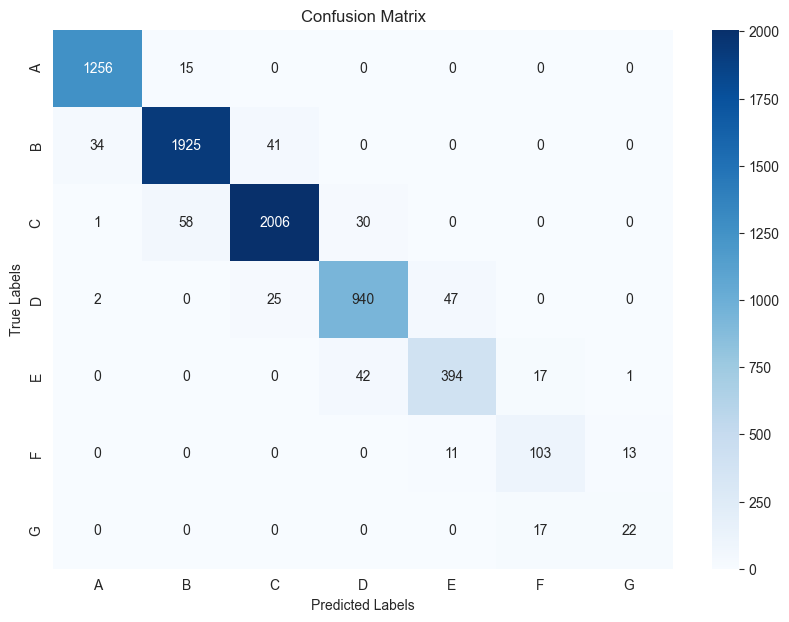

In [59]:
# Evaluating the Model

# Split data for validation
X_train_split, X_eval, y_train_split, y_eval = train_test_split (X_train, y_train_encoded, test_size=0.7,
                                                                 random_state=42)

# Refit on train split and evaluate
clf.fit (X_train_split, y_train_split)
y_eval_pred = clf.predict (X_eval)

# Metrics
accuracy = accuracy_score (y_eval, y_eval_pred)
precision = precision_score (y_eval, y_eval_pred, average='macro')
recall = recall_score (y_eval, y_eval_pred, average='macro')
conf_matrix = confusion_matrix (y_eval, y_eval_pred)

print (f"Accuracy: {accuracy:.2f}")
print (f"Precision: {precision:.2f}")
print (f"Sensitivity (Recall): {recall:.2f}")
print (f"Confusion Matrix:\n{conf_matrix}")

# Confusion matrix visualization
plt.figure (figsize=(10, 7))
sns.heatmap (conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_,
             yticklabels=label_enc.classes_)
plt.title ("Confusion Matrix")
plt.xlabel ("Predicted Labels")
plt.ylabel ("True Labels")
plt.show ()


# Cross-validation

Cross-validation Accuracy: 0.99 ± 0.00
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


,params,mean_test_score,std_test_score
26,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.9882,0.002249
35,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.9881,0.002177
25,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.9880,0.002280
24,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.9880,0.002280
34,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.9878,0.002182
33,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.9878,0.002182
32,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.9871,0.002396
23,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.9870,0.002236
20,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.9869,0.002396
27,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.9869,0.001356


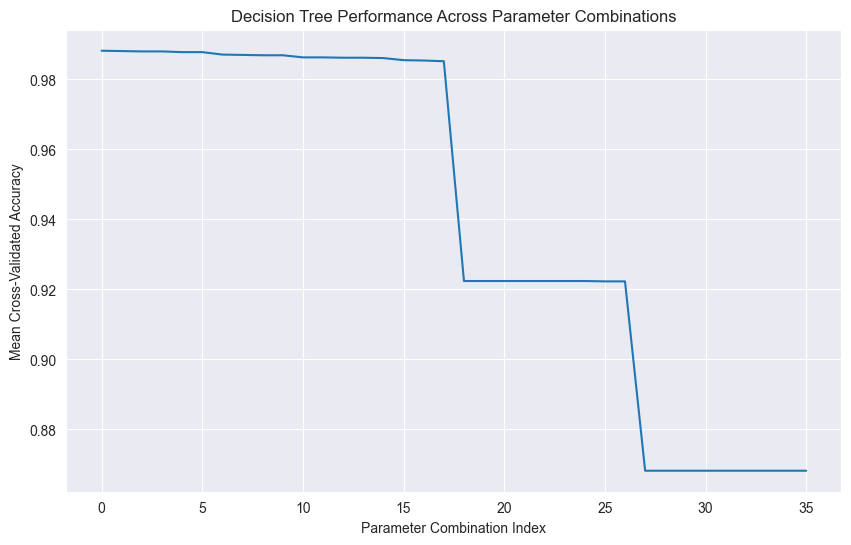

In [60]:

cv_scores = cross_val_score (clf, X_train, y_train_encoded, cv=5, scoring='accuracy')
print (f"Cross-validation Accuracy: {cv_scores.mean ():.2f} ± {cv_scores.std ():.2f}")

# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV (estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit (X_train, y_train_encoded)

print (f"Best Parameters: {grid_search.best_params_}")

dt_results = pd.DataFrame(grid_search.cv_results_)
dt_results = dt_results.sort_values(by='mean_test_score', ascending=False)
display(dt_results[['params', 'mean_test_score', 'std_test_score']])

# Visualize performance across different max_depth values
max_depths = [param['max_depth'] if param['max_depth'] is not None else 'None' for param in dt_results['params']]
mean_scores = dt_results['mean_test_score']

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(mean_scores)), y=mean_scores)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Decision Tree Performance Across Parameter Combinations')
plt.show()

# Feature importance

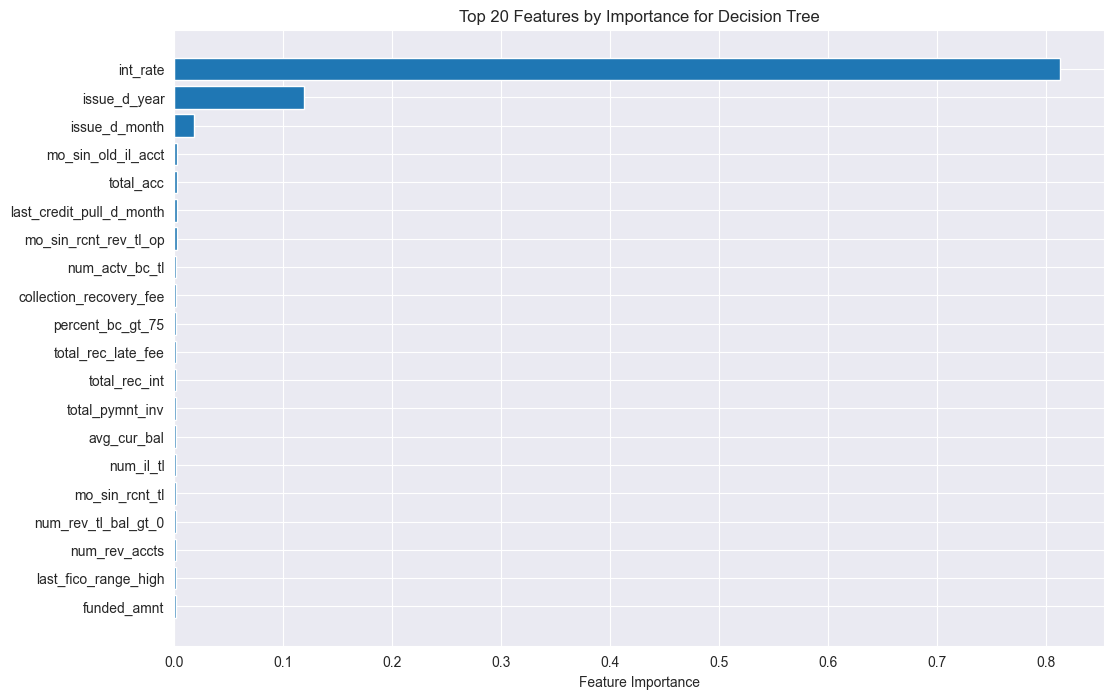

In [61]:
# Number of top features to display
n_top_features = 20

# Get feature importance and sort them
feature_importances = clf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = X_train.columns[sorted_idx]

# Filter for top N features
top_features = sorted_features[:n_top_features]
top_importances = feature_importances[sorted_idx][:n_top_features]

# Plot the top N feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_importances)
plt.xlabel("Feature Importance")
plt.title(f"Top {n_top_features} Features by Importance for Decision Tree")
plt.gca().invert_yaxis()  # Reverse the order to show the most important at the top
plt.show()

# Training logisticc regression


In [62]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test)

# Decode predictions to original labels
y_pred_labels_lr = label_enc.inverse_transform(y_pred_lr)

# Save predictions
test_data['predicted_grade_lr'] = y_pred_labels_lr
test_data.to_csv('loan-10k_predictions_lr.csv', index=False)
print("Logistic Regression predictions saved to 'loan-10k_predictions_lr.csv'")


Logistic Regression predictions saved to 'loan-10k_predictions_lr.csv'


# Evaluating logistic 

Logistic Regression Accuracy: 0.84
Logistic Regression Precision: 0.65
Logistic Regression Sensitivity (Recall): 0.63
Logistic Regression Confusion Matrix:
[[1211   60    0    0    0    0    0]
 [ 100 1782  118    0    0    0    0]
 [   1  194 1818   79    3    0    0]
 [   1    1  159  786   58    4    5]
 [   0    0    0  175  223   38   18]
 [   0    0    0    4   65   48   10]
 [   0    0    0    0   10   26    3]]


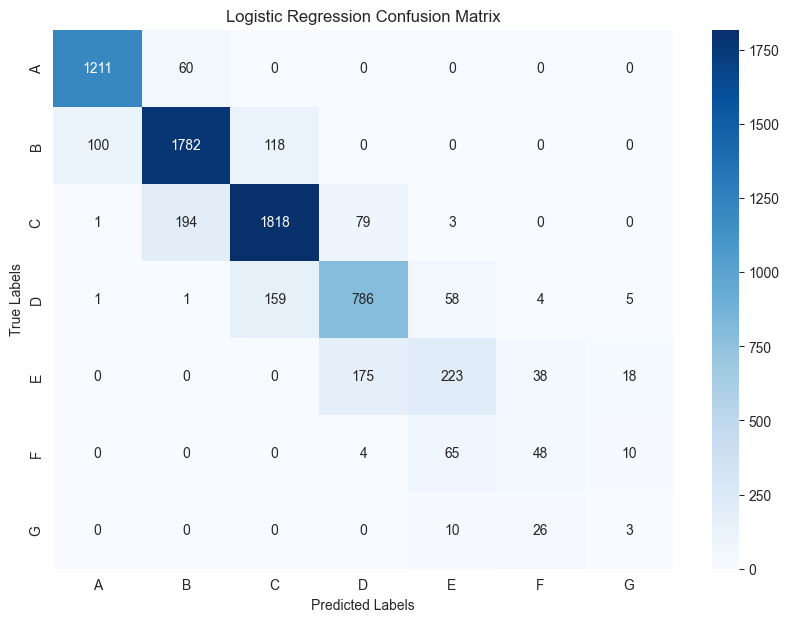

In [63]:
# Split data for validation
X_train_split_lr, X_eval_lr, y_train_split_lr, y_eval_lr = train_test_split(
    X_train, y_train_encoded, test_size=0.7, random_state=42)

# Refit on train split and evaluate
lr_model.fit(X_train_split_lr, y_train_split_lr)
y_eval_pred_lr = lr_model.predict(X_eval_lr)

# Metrics
accuracy_lr = accuracy_score(y_eval_lr, y_eval_pred_lr)
precision_lr = precision_score(y_eval_lr, y_eval_pred_lr, average='macro')
recall_lr = recall_score(y_eval_lr, y_eval_pred_lr, average='macro')
conf_matrix_lr = confusion_matrix(y_eval_lr, y_eval_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Sensitivity (Recall): {recall_lr:.2f}")
print(f"Logistic Regression Confusion Matrix:\n{conf_matrix_lr}")

# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Cross-Validation 


In [64]:
cv_scores_lr = cross_val_score(lr_model, X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-validation Accuracy: {cv_scores_lr.mean():.2f} ± {cv_scores_lr.std():.2f}")

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000),
                              param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train_encoded)

print(f"Logistic Regression Best Parameters: {grid_search_lr.best_params_}")

# Record GridSearchCV results
lr_results = pd.DataFrame(grid_search_lr.cv_results_)
lr_results = lr_results.sort_values(by='mean_test_score', ascending=False)
display(lr_results[['params', 'mean_test_score', 'std_test_score']])


Logistic Regression Cross-validation Accuracy: 0.87 ± 0.01


/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-

Logistic Regression Best Parameters: {'C': 10, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}


,params,mean_test_score,std_test_score
22,"{'C': 10, 'multi_class': 'multinomial', 'penal...",0.8712,0.005173
18,"{'C': 10, 'multi_class': 'auto', 'penalty': 'l...",0.8712,0.005173
12,"{'C': 1, 'multi_class': 'auto', 'penalty': 'l2...",0.8702,0.006705
16,"{'C': 1, 'multi_class': 'multinomial', 'penalt...",0.8702,0.006705
19,"{'C': 10, 'multi_class': 'auto', 'penalty': 'l...",0.8662,0.003982
23,"{'C': 10, 'multi_class': 'multinomial', 'penal...",0.8662,0.003982
17,"{'C': 1, 'multi_class': 'multinomial', 'penalt...",0.8629,0.004893
13,"{'C': 1, 'multi_class': 'auto', 'penalty': 'l2...",0.8629,0.004893
6,"{'C': 0.1, 'multi_class': 'auto', 'penalty': '...",0.8427,0.004966
10,"{'C': 0.1, 'multi_class': 'multinomial', 'pena...",0.8427,0.004966


# Feature importance

/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/volodic/PycharmProjects/ML-

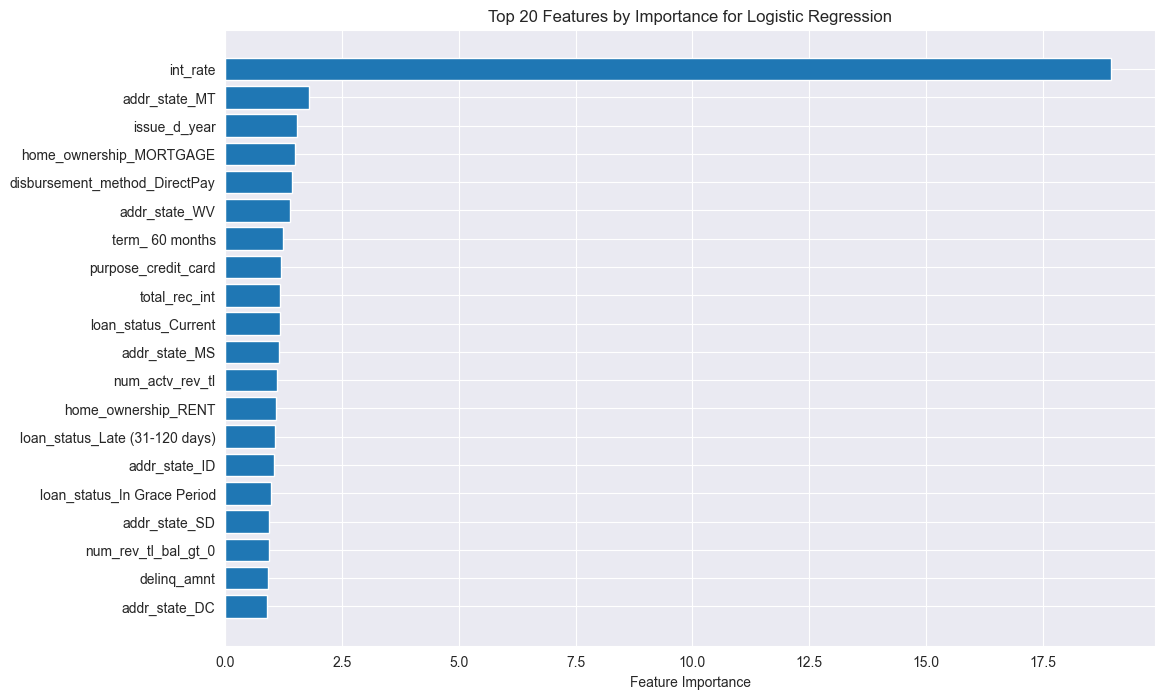

In [65]:
# Re-train logistic regression with best parameters
grid_search_lr.fit(X_train, y_train_encoded)
best_lr_model = grid_search_lr.best_estimator_
best_lr_model.fit(X_train, y_train_encoded)

# For logistic regression, feature importance can be inferred from the coefficients
coefficients = np.abs(best_lr_model.coef_)
feature_importance_lr = np.mean(coefficients, axis=0)

# Get the indices of the top features
sorted_idx_lr = np.argsort(feature_importance_lr)[::-1]
sorted_features_lr = X_train.columns[sorted_idx_lr]

# Number of top features to display
n_top_features_lr = 20

# Filter for top N features
top_features_lr = sorted_features_lr[:n_top_features_lr]
top_importances_lr = feature_importance_lr[sorted_idx_lr][:n_top_features_lr]

# Plot the top N feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features_lr, top_importances_lr)
plt.xlabel("Feature Importance")
plt.title(f"Top {n_top_features_lr} Features by Importance for Logistic Regression")
plt.gca().invert_yaxis()  # Reverse the order to show the most important at the top
plt.show()




# K-NN classifier training

In [66]:
# Initialize the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Decode predictions to original labels
y_pred_labels_knn = label_enc.inverse_transform(y_pred_knn)

# Save predictions
test_data['predicted_grade_knn'] = y_pred_labels_knn
test_data.to_csv('loan-10k_predictions_knn.csv', index=False)
print("KNN predictions saved to 'loan-10k_predictions_knn.csv'")

KNN predictions saved to 'loan-10k_predictions_knn.csv'


# Evaluation 


KNN Accuracy: 0.40
KNN Precision: 0.36
KNN Sensitivity (Recall): 0.25
KNN Confusion Matrix:
[[ 764  438   65    4    0    0    0]
 [ 537 1005  414   42    2    0    0]
 [ 189  940  812  148    6    0    0]
 [  35  285  508  165   18    2    1]
 [   7   71  217  127   28    3    1]
 [   1   14   54   44   11    3    0]
 [   0    2   15    6   12    3    1]]


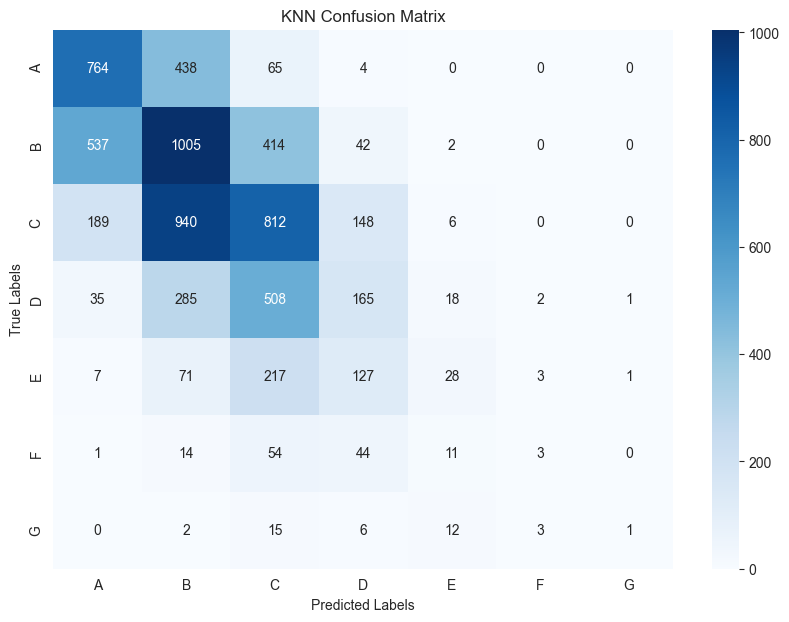

In [67]:
# Split data for validation
X_train_split_knn, X_eval_knn, y_train_split_knn, y_eval_knn = train_test_split(
    X_train, y_train_encoded, test_size=0.7, random_state=42)

# Refit on train split and evaluate
knn_model.fit(X_train_split_knn, y_train_split_knn)
y_eval_pred_knn = knn_model.predict(X_eval_knn)

# Metrics
accuracy_knn = accuracy_score(y_eval_knn, y_eval_pred_knn)
precision_knn = precision_score(y_eval_knn, y_eval_pred_knn, average='macro')
recall_knn = recall_score(y_eval_knn, y_eval_pred_knn, average='macro')
conf_matrix_knn = confusion_matrix(y_eval_knn, y_eval_pred_knn)

print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"KNN Precision: {precision_knn:.2f}")
print(f"KNN Sensitivity (Recall): {recall_knn:.2f}")
print(f"KNN Confusion Matrix:\n{conf_matrix_knn}")

# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Cross-validation


In [68]:
cv_scores_knn = cross_val_score(knn_model, X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"KNN Cross-validation Accuracy: {cv_scores_knn.mean():.2f} ± {cv_scores_knn.std():.2f}")

# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train_encoded)

print(f"KNN Best Parameters: {grid_search_knn.best_params_}")

# Record GridSearchCV results
knn_results = pd.DataFrame(grid_search_knn.cv_results_)
knn_results = knn_results.sort_values(by='mean_test_score', ascending=False)
display(knn_results[['params', 'mean_test_score', 'std_test_score']])
cv_scores_lr = cross_val_score(lr_model, X_train, y_train_encoded, cv=5, scoring='accuracy')

performance_summary = pd.DataFrame({
    'Classifier': ['Decision Tree', 'Logistic Regression', 'KNN'],
    'Holdout Accuracy': [accuracy, accuracy_lr, accuracy_knn],
    'Cross-Validation Accuracy': [cv_scores.mean(), cv_scores_lr.mean(), cv_scores_knn.mean()],
    'Holdout Precision': [precision, precision_lr, precision_knn],
    'Holdout Recall': [recall, recall_lr, recall_knn]
})



KNN Cross-validation Accuracy: 0.42 ± 0.00
KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


,params,mean_test_score,std_test_score
15,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.4859,0.009008
13,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei...",0.4787,0.008818
14,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.4769,0.010234
12,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei...",0.4662,0.009271
11,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.4641,0.008714
10,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.4556,0.008133
7,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.4448,0.007215
9,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.4401,0.010897
5,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.4399,0.008772
3,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.4353,0.010524


# Feature Importance 

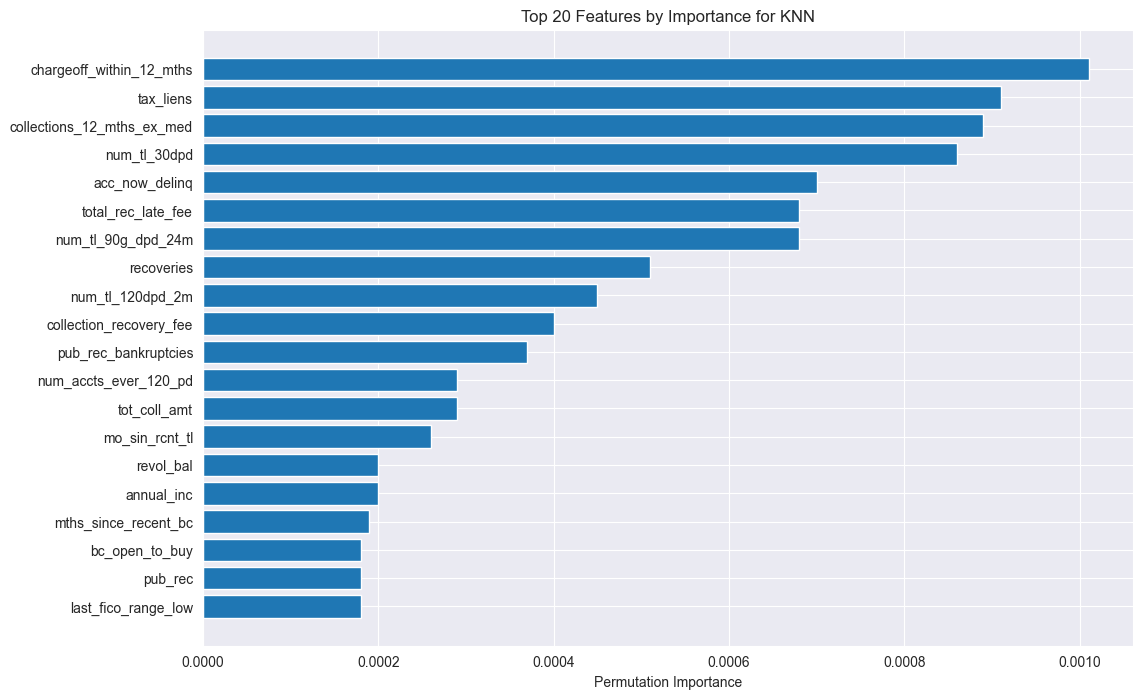

In [69]:
# Note: KNN does not provide feature importances directly.
# However, we can estimate feature importance using permutation importance.

from sklearn.inspection import permutation_importance

# Re-train KNN with best parameters
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train_encoded)

# Compute permutation importance
result = permutation_importance(best_knn_model, X_train, y_train_encoded, n_repeats=10, random_state=42, n_jobs=-1)

# Get the indices of the top features
sorted_idx_knn = result.importances_mean.argsort()[::-1]

# Number of top features to display
n_top_features_knn = 20

# Filter for top N features
top_features_knn = X_train.columns[sorted_idx_knn][:n_top_features_knn]
top_importances_knn = result.importances_mean[sorted_idx_knn][:n_top_features_knn]

# Plot the top N feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features_knn, top_importances_knn)
plt.xlabel("Permutation Importance")
plt.title(f"Top {n_top_features_knn} Features by Importance for KNN")
plt.gca().invert_yaxis()  # Reverse the order to show the most important at the top
plt.show()



# Comparation between the classifiers


,Classifier,Holdout Accuracy,Cross-Validation Accuracy,Holdout Precision,Holdout Recall
0,Decision Tree,0.949429,0.9869,0.866638,0.868315
1,Logistic Regression,0.838714,0.8702,0.648012,0.633255
2,KNN,0.396857,0.4250,0.361449,0.252121


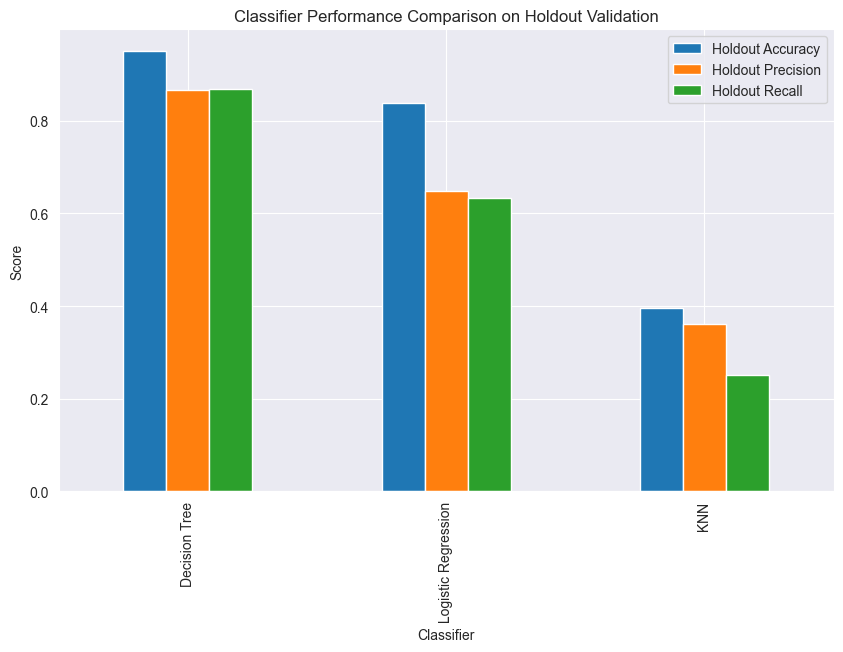

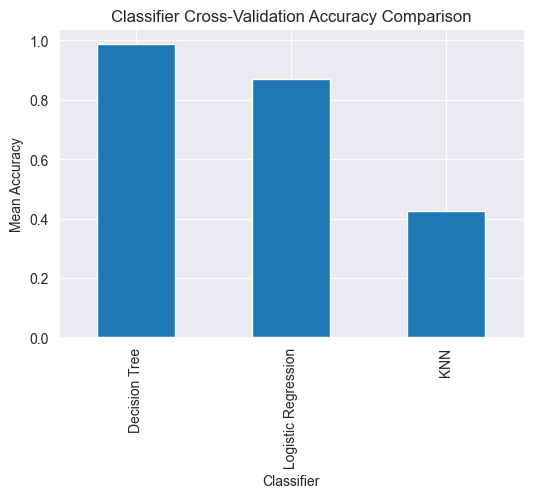

In [70]:
performance_summary = pd.DataFrame({
    'Classifier': ['Decision Tree', 'Logistic Regression', 'KNN'],
    'Holdout Accuracy': [accuracy, accuracy_lr, accuracy_knn],
    'Cross-Validation Accuracy': [cv_scores.mean(), cv_scores_lr.mean(), cv_scores_knn.mean()],
    'Holdout Precision': [precision, precision_lr, precision_knn],
    'Holdout Recall': [recall, recall_lr, recall_knn]
})
display(performance_summary)

# Plotting the performance metrics
metrics = ['Holdout Accuracy', 'Holdout Precision', 'Holdout Recall']
performance_summary.set_index('Classifier')[metrics].plot(kind='bar', figsize=(10, 6))
plt.title('Classifier Performance Comparison on Holdout Validation')
plt.ylabel('Score')
plt.show()

# Plot Cross-Validation Accuracy
performance_summary.set_index('Classifier')['Cross-Validation Accuracy'].plot(kind='bar', figsize=(6, 4))
plt.title('Classifier Cross-Validation Accuracy Comparison')
plt.ylabel('Mean Accuracy')
plt.show()


# Playing with the hyperparameters

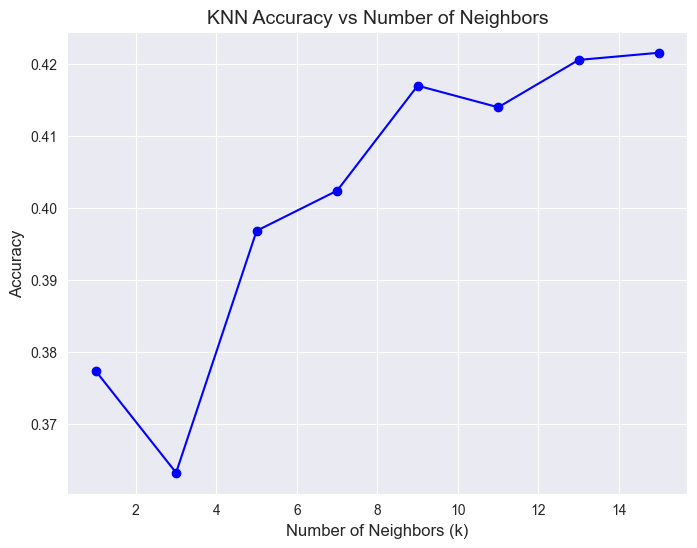

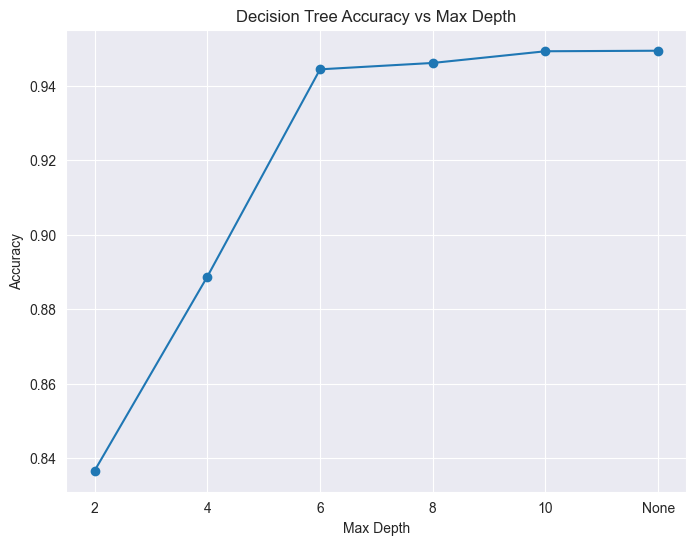

In [71]:
# For KNN, vary n_neighbors
neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
accuracy_scores_knn = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_split_knn, y_train_split_knn)
    y_eval_pred_knn_k = knn.predict(X_eval_knn)
    acc = accuracy_score(y_eval_knn, y_eval_pred_knn_k)
    accuracy_scores_knn.append(acc)

plt.figure(figsize=(8, 6))
plt.plot(neighbors, accuracy_scores_knn, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Accuracy vs Number of Neighbors', fontsize=14)
plt.grid(True)
plt.show()

# For Decision Tree, vary max_depth
max_depths = [2, 4, 6, 8, 10, None]
accuracy_scores_dt = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_split, y_train_split)
    y_eval_pred_dt = dt.predict(X_eval)
    acc = accuracy_score(y_eval, y_eval_pred_dt)
    accuracy_scores_dt.append(acc)

plt.figure(figsize=(8, 6))
plt.plot([str(d) for d in max_depths], accuracy_scores_dt, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.show()


# Comparison of Holdout Validation and Cross-Validation


,Validation Method,Decision Tree Accuracy,Logistic Regression Accuracy,KNN Accuracy
0,Holdout,0.949429,0.838714,0.396857
1,Cross-Validation,0.986900,0.870200,0.425000


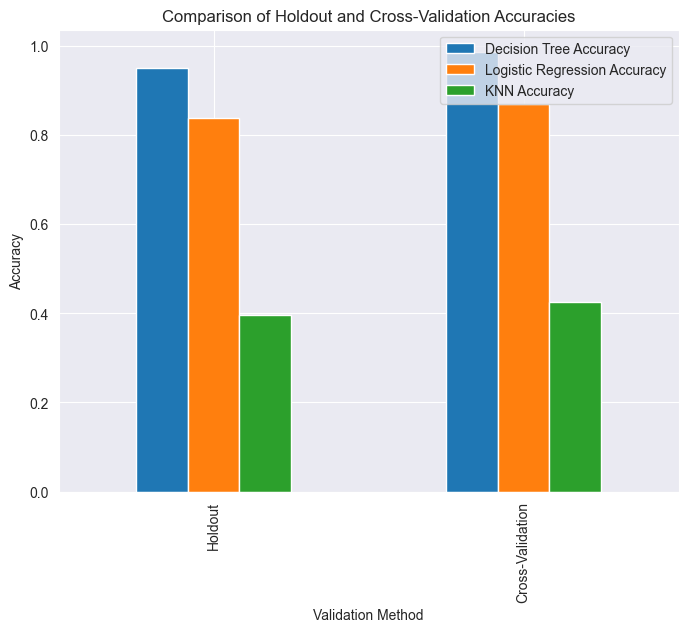

In [72]:
comparison_df = pd.DataFrame({
    'Validation Method': ['Holdout', 'Cross-Validation'],
    'Decision Tree Accuracy': [accuracy, cv_scores.mean()],
    'Logistic Regression Accuracy': [accuracy_lr, cv_scores_lr.mean()],
    'KNN Accuracy': [accuracy_knn, cv_scores_knn.mean()]
})
display(comparison_df)

# Plot the comparison
comparison_df.set_index('Validation Method')[['Decision Tree Accuracy', 'Logistic Regression Accuracy', 'KNN Accuracy']].plot(kind='bar', figsize=(8, 6))
plt.ylabel('Accuracy')
plt.title('Comparison of Holdout and Cross-Validation Accuracies')
plt.show()

# Perfomance analysis

,Size,DT_Train_Time,DT_Predict_Time,LR_Train_Time,LR_Predict_Time,KNN_Train_Time,KNN_Predict_Time
0,0.1,0.025074,0.006483,0.065559,0.017747,0.006958,0.160793
1,0.3,0.084409,0.013934,0.539500,0.032582,0.017061,0.450851
2,0.5,0.246954,0.010342,0.374517,0.011110,0.010447,0.212154
3,0.7,0.147621,0.005270,0.377475,0.004580,0.008133,0.264775
4,0.9,0.175996,0.007212,0.502881,0.003927,0.007115,0.288234


Decision Tree vs Logistic Regression - t-statistic: 37.20, p-value: 0.0000


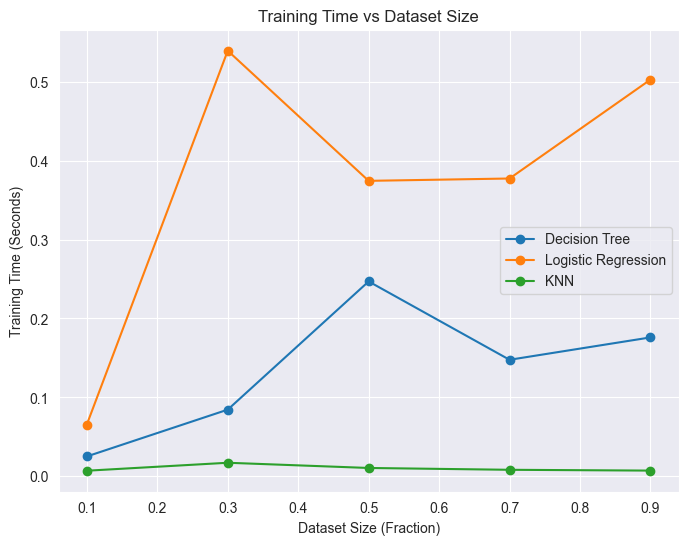

In [76]:
import time
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_rel

dataset_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
times = {
    'Size': [],
    'DT_Train_Time': [],
    'DT_Predict_Time': [],
    'LR_Train_Time': [],
    'LR_Predict_Time': [],
    'KNN_Train_Time': [],
    'KNN_Predict_Time': []
}

for size in dataset_sizes:
    # Sample the dataset
    X_sample, _, y_sample, _ = train_test_split(
        X_train, y_train_encoded, train_size=size, random_state=42
    )

    # Decision Tree
    start_time = time.time()
    clf.fit(X_sample, y_sample)
    dt_train_time = time.time() - start_time

    start_time = time.time()
    clf.predict(X_eval)
    dt_predict_time = time.time() - start_time

    # Logistic Regression
    start_time = time.time()
    lr_model.fit(X_sample, y_sample)
    lr_train_time = time.time() - start_time

    start_time = time.time()
    lr_model.predict(X_eval_lr)
    lr_predict_time = time.time() - start_time

    # KNN
    start_time = time.time()
    knn_model.fit(X_sample, y_sample)
    knn_train_time = time.time() - start_time

    start_time = time.time()
    knn_model.predict(X_eval_knn)
    knn_predict_time = time.time() - start_time

    # Append times to the dictionary
    times['Size'].append(size)
    times['DT_Train_Time'].append(dt_train_time)
    times['DT_Predict_Time'].append(dt_predict_time)
    times['LR_Train_Time'].append(lr_train_time)
    times['LR_Predict_Time'].append(lr_predict_time)
    times['KNN_Train_Time'].append(knn_train_time)
    times['KNN_Predict_Time'].append(knn_predict_time)

# Create a DataFrame from the times dictionary
runtime_df = pd.DataFrame(times)
display(runtime_df)

# Statistical Significance Testing
t_stat, p_value = ttest_rel(cv_scores, cv_scores_lr)
print(f"Decision Tree vs Logistic Regression - t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

# Plotting training time vs dataset size
plt.figure(figsize=(8, 6))
plt.plot(runtime_df['Size'], runtime_df['DT_Train_Time'], label='Decision Tree', marker='o')
plt.plot(runtime_df['Size'], runtime_df['LR_Train_Time'], label='Logistic Regression', marker='o')
plt.plot(runtime_df['Size'], runtime_df['KNN_Train_Time'], label='KNN', marker='o')
plt.xlabel('Dataset Size (Fraction)')
plt.ylabel('Training Time (Seconds)')
plt.title('Training Time vs Dataset Size')
plt.legend()
plt.show()


In [83]:

submission = pd.DataFrame({
        'Id': test_data['ID'],
        'Grade': y_pred_labels  
    })
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created for Kaggle competition.")

Submission file 'submission.csv' created for Kaggle competition.
